In [198]:
from  scipy import fft,ifft
import numpy as np
import matplotlib.pyplot as plt
from classical_ham import classical_ham
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def gaussian(x, mu, sig, p0):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))*np.exp(1j*p0*(x-mu))


In [185]:
hbar = 1
tau=1
m=1
n=10
xmax=1
xmin=-xmax
x=np.linspace(xmin,xmax,2**n)


In [186]:
vx=10*x**2 * 0
p2m=np.diag(np.exp(-1j*x**2/(2*m) * tau))
v=np.diag(np.exp(-1j*vx *tau/2)[::-1])

In [187]:

def apply_h(x0,t):
    applyh=lambda x : v@ifft(p2m@fft(v@x))
    x=x0
    for i in range(t):
        x=applyh(x)
    return x

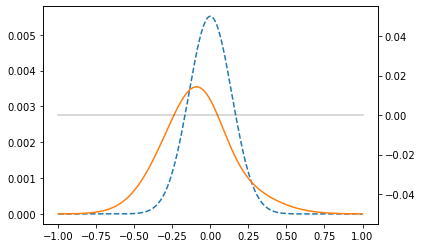

In [192]:
x0=gaussian(x,0,.2,0)
x0/=np.linalg.norm(x0)
x1=apply_h(x0,1)
plt.plot(x,[i*i.conj() for i in x1],ls="--")
x1=apply_h(x0,400)
plt.plot(x,[i*i.conj() for i in x1])
plt.twinx()
plt.plot(x,vx,c="k",alpha=0.2)

In [255]:
h=classical_ham(n=10, start_mu=0, start_p0=0, start_sigma=.02)
h.set_V(h.x**2 * 0)

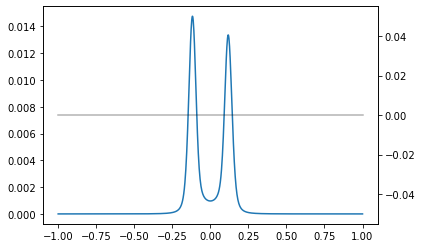

In [256]:
T=210
y=h.get_result(T,dt=100)
plt.plot(h.x,y)
plt.twinx()
plt.plot(h.x,h.v,c="k",alpha=0.3)

In [254]:
y1-y

array([-6.93779693e-13, -6.94556817e-12, -1.32867506e-11, ...,
        1.76097870e-11,  1.16065817e-11,  5.49551993e-12])